In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime

from sklearn.metrics import silhouette_score, silhouette_samples

from tqdm import tqdm


# 1 Einlesen der Daten

In [2]:
df_slurm_clustered = pd.read_csv('tweaked_datasets/slurm_dataset_clustered.csv', index_col=0)
df_onehot_clustered = pd.read_csv('tweaked_datasets/slurm_dataset_onehot_clustered.csv', index_col=0)

In [3]:
df_slurm_clustered.head()

,AllocCPUS,AllocNodes,ElapsedRaw,ExitCode,Flags,Priority,Partition,QOSRAW,ReqCPUS,ReqNodes,ResvCPURAW,TimelimitRaw,ReqBilling,ReqMem_in_MB,Reserved_in_s,AllocMem_in_MB,Start_day_of_week,Start_hour_of_day,Start_month,Cluster
0,768,32,35,0:0,SchedBackfill,4294901759,regular,1,384,32,0,7200.0,384.0,7900.0,0,6067200.0,4,16,1,D
1,384,16,167,other,SchedMain,4294901758,regular,1,192,16,192,7200.0,192.0,7900.0,1,3033600.0,4,16,1,C
2,384,16,25,0:0,SchedMain,4294901757,regular,1,192,16,192,7200.0,192.0,7900.0,1,3033600.0,4,16,1,C
3,192,8,19,0:0,SchedMain,4294901756,regular,1,96,8,96,7200.0,96.0,7900.0,1,1516800.0,4,16,1,C
4,24,1,236,0:0,SchedSubmit,4294901755,regular,1,1,1,0,1440.0,1.0,7900.0,0,189600.0,4,16,1,C


# 2 Übersicht der Cluster

In [4]:
df_slurm_clustered.Cluster.value_counts()

A    269776
C     85602
B     83250
D     49891
Name: Cluster, dtype: int64

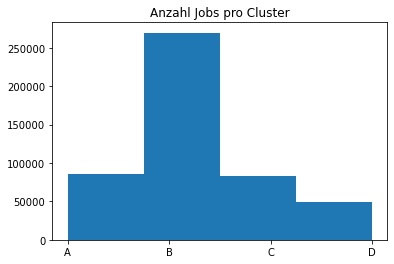

In [5]:
fig, ax = plt.subplots()
ax.hist(df_onehot_clustered.Cluster.sort_values(), bins=len(df_onehot_clustered.Cluster.unique()))
ax.set_title('Anzahl Jobs pro Cluster')
plt.show()

Hier fällt auf den ersten Blick auf, dass Cluster B das größte der 4 Cluster ist. Alle Cluster nehmen einen großen Teil des Datensatzes ein, wodurch die Verteilung bzw. Zuordnung der Cluster logisch erscheint und eine genauere Betrachtung sinnvoll ist.

In [6]:
df_slurm_clustered.columns

Index(['AllocCPUS', 'AllocNodes', 'ElapsedRaw', 'ExitCode', 'Flags',
       'Priority', 'Partition', 'QOSRAW', 'ReqCPUS', 'ReqNodes', 'ResvCPURAW',
       'TimelimitRaw', 'ReqBilling', 'ReqMem_in_MB', 'Reserved_in_s',
       'AllocMem_in_MB', 'Start_day_of_week', 'Start_hour_of_day',
       'Start_month', 'Cluster'],
      dtype='object')

# 3 Silhouetteplot der Cluster

In [15]:
def plot_silhouette(df: pd.DataFrame, cluster_label_column: str , n_clusters: int):
    """
    df: Ein Pandas DataFrame mit den Daten.
    cluster_label_column: Der Name der Spalte im DataFrame, die die Cluster-Labels enthält.
    n_clusters: Die Anzahl der Cluster.
    """

    X = df.drop(cluster_label_column, axis=1).values
    cluster_labels = df[cluster_label_column].values

    # Berechnung der Silhouette-Scores für jedes Cluster
    print(f'{datetime.now()} - Calculating silhouette score...')
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'{datetime.now()} - Calculating silhouette samples...')
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Plotting 
    fig, ax = plt.subplots(figsize=(10, 7))

    y_lower, y_upper = 0, 0
    yticks = []

    for i in tqdm(range(n_clusters)):
        print(f'{datetime.now()} - Plotting: Step {i} / {n_clusters}...')
        # Berechnung der Silhouette-Werte für jedes Cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper += size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)

        ax.barh(range(y_lower, y_upper),
                ith_cluster_silhouette_values,
                height=1.0,
                edgecolor='none',
                color=color)

        yticks.append((y_lower + y_upper) / 2.)
        y_lower += size_cluster_i

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks(yticks)
    ax.grid(ls=':')
    ax.set_yticklabels(range(n_clusters))
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    plt.show()

In [20]:
df_onehot_clustered['Cluster_numerical'] = df_onehot_clustered.Cluster.map({'A': 0,
                                                     'B': 1,
                                                     'C': 2,
                                                     'D': 3})

2023-05-19 18:55:28.508915 - Calculating silhouette score...
2023-05-19 19:28:52.036256 - Calculating silhouette samples...


  0%|          | 0/4 [00:00<?, ?it/s]

2023-05-19 20:02:00.356509 - Plotting: Step 0 / 4...


 25%|██▌       | 1/4 [00:24<01:14, 24.87s/it]

2023-05-19 20:02:25.224775 - Plotting: Step 1 / 4...


 50%|█████     | 2/4 [01:42<01:51, 55.73s/it]

2023-05-19 20:03:42.563499 - Plotting: Step 2 / 4...


 75%|███████▌  | 3/4 [02:06<00:41, 41.32s/it]

2023-05-19 20:04:06.734716 - Plotting: Step 3 / 4...


100%|██████████| 4/4 [02:23<00:00, 35.78s/it]


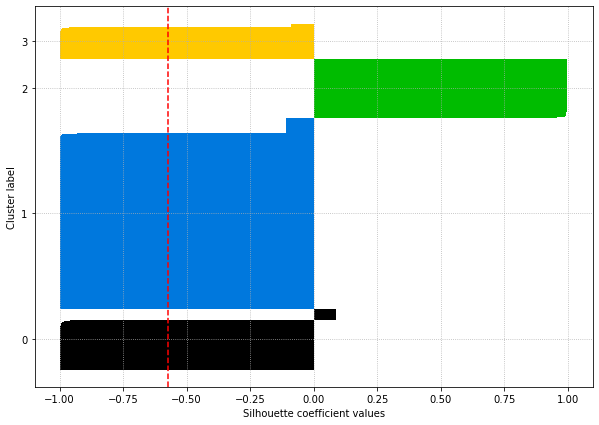

In [24]:
plot_silhouette(df_onehot_clustered.drop('Cluster', axis=1), "Cluster_numerical", len(df_onehot_clustered.Cluster_numerical.unique()))

Der Silhouetteplot zeigt, dass die Cluster untereinander wohl nicht optimal getrennt zu sein scheinen. Eventuell kann das Problem mit der Verwendung eines anderen Clusterverfahrens gelöst werden, allerdings sind diese deutlich "ressourcenhungriger".  Beispielsweise benötigt DBSCAN 1.7TiB Speicher, wofür uns leider keine Hardware zur Verfügung steht. Alternativ könnte noch weiter an den Schrauben des Preprocessing oder der Bereinigung gedreht werden. Da es allerdings etwa 90 Minuten dauert einen Silhouette-Plot für die vorliegenden Daten zu erstellen und in unserem Fall erst mit einer Clusteranzahl jenseits der 20 bessere Ergebnisse entstanden sind, werden wir die vorliegende Clustereinteilung nehmen und genauer betrachten. 

In [ ]:
df_onehot_clustered.drop('Cluster_numerical', axis=1, inplace=True)

# 4 Was unterscheidet die Cluster?

### 4.1 metrische Features

In [25]:
import help_funcs

In [30]:
df_slurm_clustered.select_dtypes(exclude=['category', 'object']).columns

Index(['AllocCPUS', 'AllocNodes', 'ElapsedRaw', 'Priority', 'QOSRAW',
       'ReqCPUS', 'ReqNodes', 'ResvCPURAW', 'TimelimitRaw', 'ReqBilling',
       'ReqMem_in_MB', 'Reserved_in_s', 'AllocMem_in_MB', 'Start_day_of_week',
       'Start_hour_of_day', 'Start_month'],
      dtype='object')

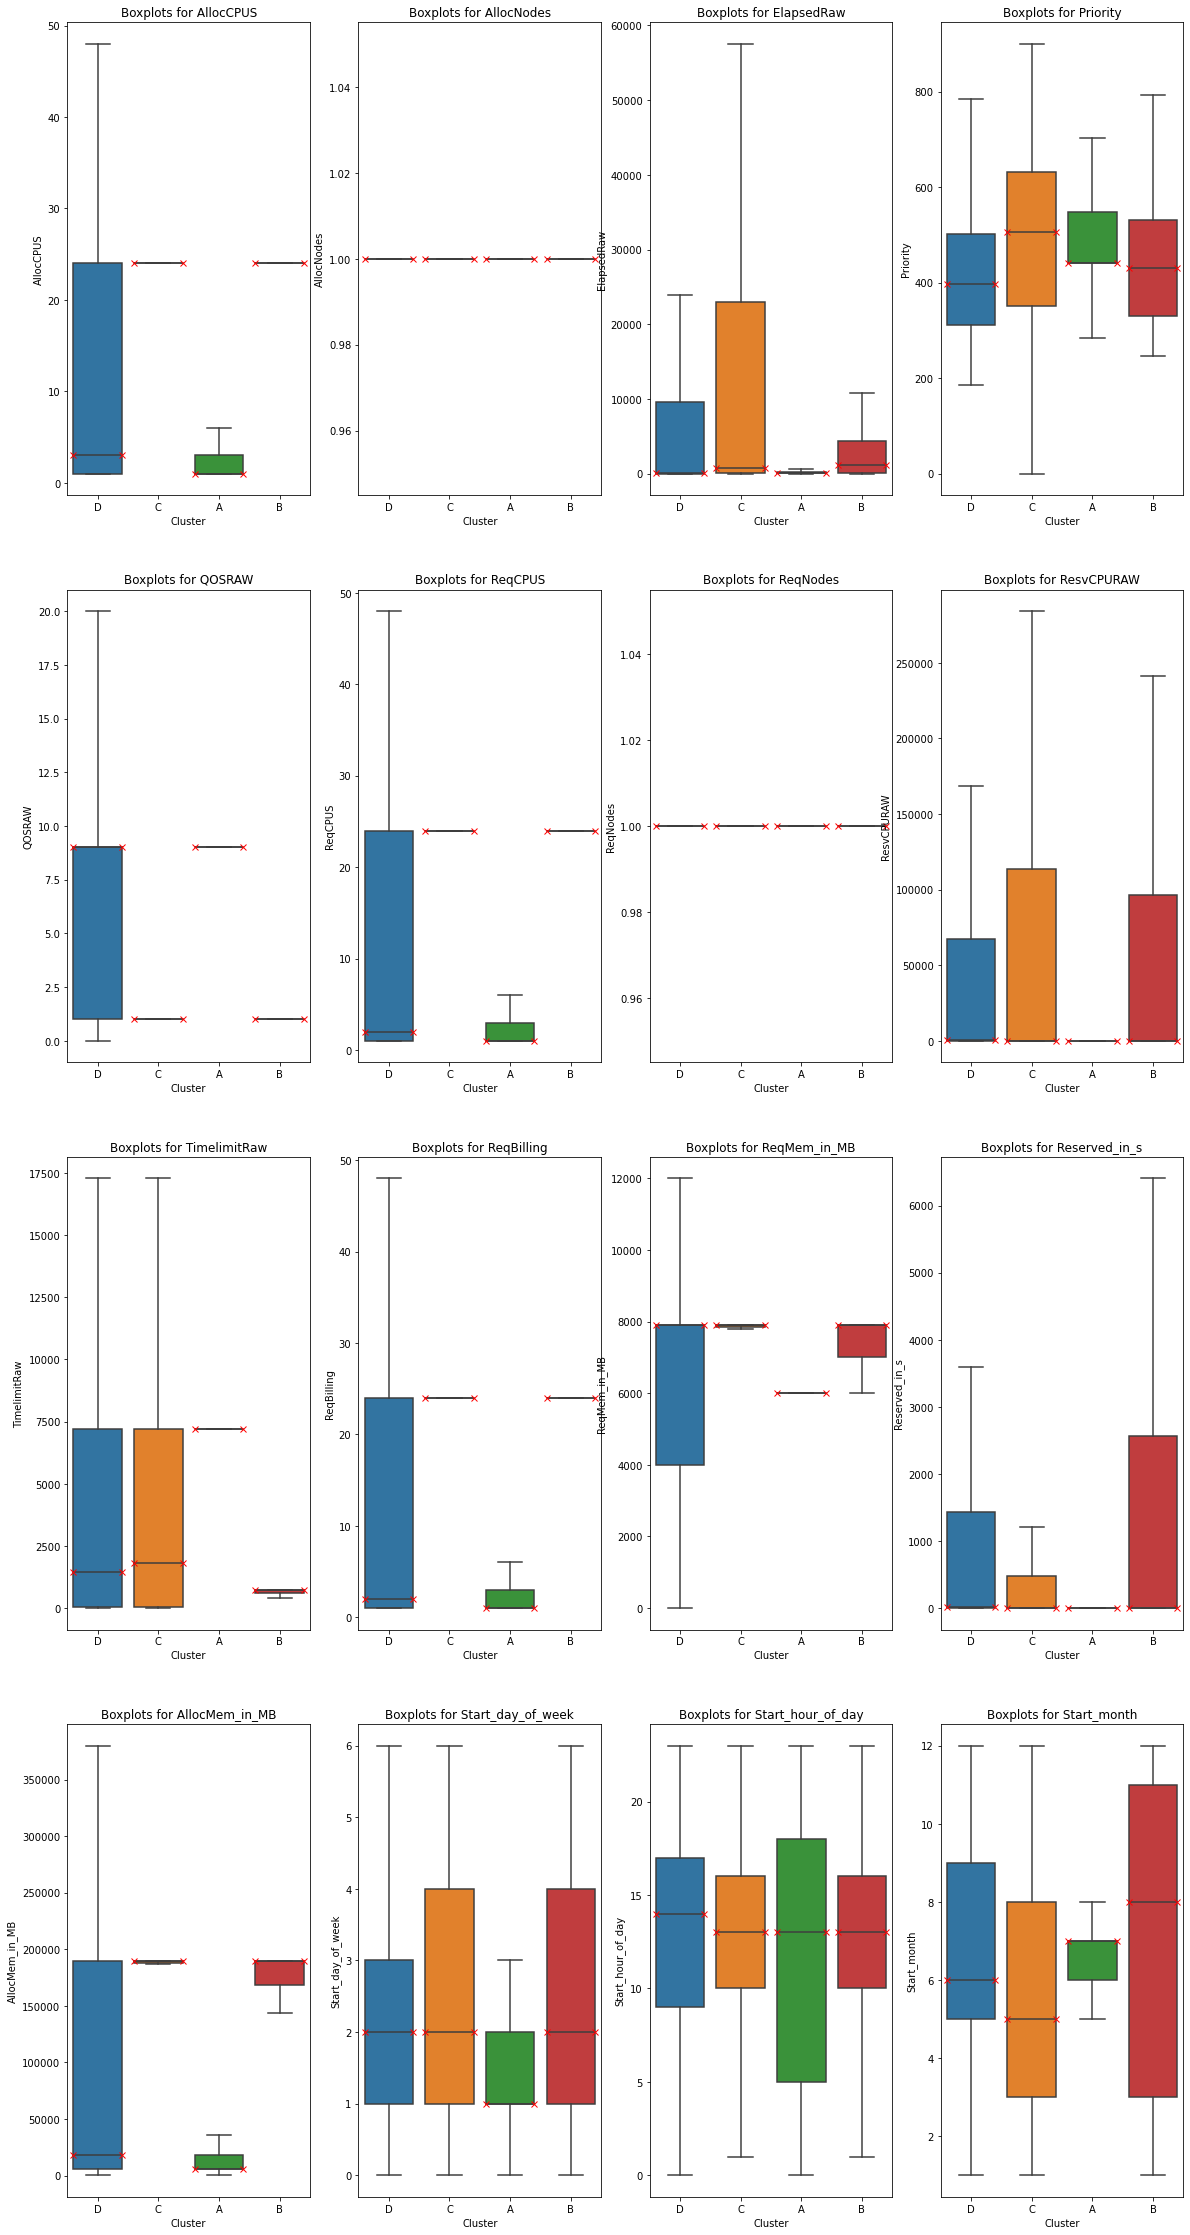

In [26]:
help_funcs.create_boxplots(df_slurm_clustered)

Die numerischen Features, die die Cluster am besten zu trennen scheinen, sind AllocCPUS, QOS, ReqCPUS, Timelimit, ReqBilling und AllocMem. Cluster D scheint in nahezu allen Spalten ein sehr großes Intervall abzudecken. Zu erwähnen ist, dass in den Plots die Ausreißer ausgeblendet wurden, da es hier um die Unterscheidung der Cluster geht und nicht wie einzelne Punkte aus dem Raster fallen. 

Die Cluster B und C scheinen eher in die Kategorie 'High-Performance' Cluster zu fallen, wenn die Bezeichnung so gewählt werden darf. Es werden zumindest im Durchschnitt deutlich mehr Ressourcen gebraucht als in den anderen beiden Clustern. Wie bereits erwähnt deckt Cluster B ein großes Intervall ab, allerdings liegt der Median meistens sehr nahe bei dem von Cluster C.

Doch was unterscheidet Cluster A von Cluster C bzw. B von D?
Diese Fragen lassen sich bei Betrachtung der kategorischen Features beantworten.

### 4.2 kategorische Features

In [29]:
df_slurm_clustered.select_dtypes(include=['category', 'object']).columns

Index(['ExitCode', 'Flags', 'Partition', 'Cluster'], dtype='object')

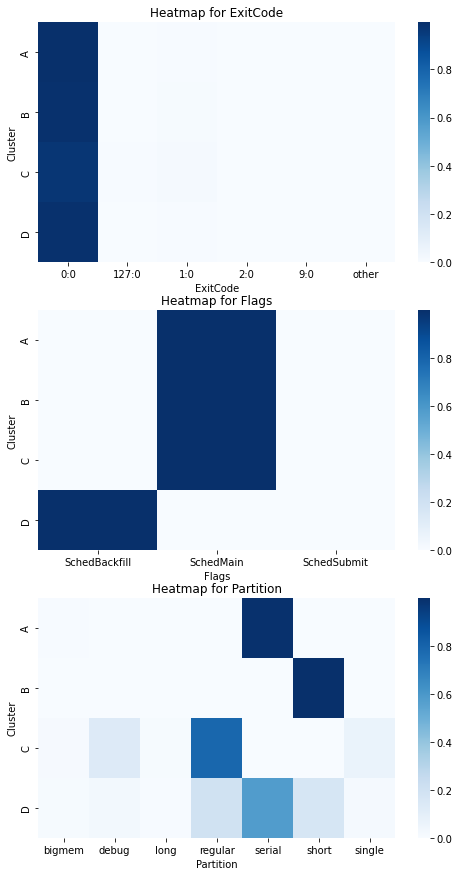

In [31]:
help_funcs.create_heatmaps(df_slurm_clustered)

Unterschied Cluster B & C ("High-Performance"):
Cluster B werden hauptsächlich Partition short zugeordnet. Bei Cluster C verteilt es sich auf die restlichen Partitionen, wobei regular hier am häufigsten auftritt.

Unterschied Cluster A & D:
Bei Cluster A wurde hauptsächlich die Flag 'SchedMain' gesetzt. Bei Cluster D (und auch den anderen beiden Clustern) werden hauptsächlich die Flags 'SchedMain' zugeordnet.

Mehr zur Unterscheidung der Cluster in der Präsentation.